# Lasso regression, Ridge regression, Elastic-Net

以下的程式範例會使用scikit-learn內建的toy dataset: diabetes來示範。

示範的內容為比較各種linear regression的方法。

首先一樣需要把使用到的套件先import進來。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

讀入資料集，並且切分成 train 與 test 的部分。

由於資料集都已經清理好了，這邊就不做額外的處理。

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

首先使用OLS方法來建模，作為一個比較基準。

## Linear regression - OLS

In [4]:
# Creating a Linear Regression model object
ols_model = LinearRegression()

# Fitting the model to the data
ols_model.fit(X_train, y_train)

# Making predictions
y_pred_ols = ols_model.predict(X_test)

# Calculating Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred_ols)
print("Mean Squared Error (MSE) on test set:", mse)

# Once fitted, you can get the coefficients and intercept of the linear regression line
print("Coefficient (slope):", ols_model.coef_)
print("Intercept:", ols_model.intercept_)

Mean Squared Error (MSE) on test set: 2900.193628493483
Coefficient (slope): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995


## Linear regression - Stochastic Gradient Descent

基本上原理與gradient descent相同，但是每次更新gradient並不會遍歷所有樣本，而是只使用一個樣本。

In [5]:
# Creating a Linear Regression model object
sgd_model = SGDRegressor(penalty=None, eta0=0.03)

# Fitting the model to the data
sgd_model.fit(X_train, y_train)

# Making predictions
y_pred_sgd = sgd_model.predict(X_test)

# Calculating Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred_sgd)
print("Mean Squared Error (MSE) on test set:", mse)

# Once fitted, you can get the coefficients and intercept of the linear regression line
print("Coefficient (slope):", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)
print("n of iteration:", sgd_model.n_iter_)


Mean Squared Error (MSE) on test set: 2872.1616744718763
Coefficient (slope): [  50.63546365 -147.69938233  441.8114645   293.19266713  -36.74531262
  -82.69469075 -204.24712985  147.30127313  333.80107271  140.09686077]
Intercept: [151.5601889]
n of iteration: 1000


/Users/curtislu/Library/Caches/pypoetry/virtualenvs/ntu-ps-intro-ml-GyDE60mE-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Lasso regression

In [6]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value for different levels of regularization
lasso_model.fit(X_train, y_train)

# Making predictions
y_pred_lasso = lasso_model.predict(X_test)

# Calculating Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE) on test set:", mse)

# Printing the coefficients
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("n of iteration:", lasso_model.n_iter_)


Mean Squared Error (MSE) on test set: 2798.1934851697188
Coefficients: [   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]
Intercept: 151.57485282893947
n of iteration: 23


## Ridge regression

In [7]:
ridge_model = Ridge(alpha=0.1, solver='saga') # You can adjust the alpha value for different levels of regularization
ridge_model.fit(X_train, y_train)

# Making predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculating Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (MSE) on test set:", mse)

# Printing the coefficients
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("n of iteration:", ridge_model.n_iter_)

Mean Squared Error (MSE) on test set: 2856.4757277437116
Coefficients: [  42.86920914 -205.47397661  505.05403365  317.09718315 -108.60100201
  -86.17819659 -190.3217532   151.70077917  392.36856083   79.94204193]
Intercept: 151.4584815239511
n of iteration: [17]


## Elastic-Net

In [8]:
elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.1)  # You can adjust the alpha value for different levels of regularization
elasticnet_model.fit(X_train, y_train)

# Making predictions
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Calculating Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred_elasticnet)
print("Mean Squared Error (MSE) on test set:", mse)

# Printing the coefficients
print("Coefficients:", elasticnet_model.coef_)
print("Intercept:", elasticnet_model.intercept_)
print("n of iteration:", elasticnet_model.n_iter_)


Mean Squared Error (MSE) on test set: 2871.663570384975
Coefficients: [  44.74045267 -152.77370265  424.03587528  274.70139698  -46.55802161
  -76.64488847 -185.02031971  137.7521058   323.3185182   105.02020727]
Intercept: 151.72590427772332
n of iteration: 15


## 比較模型

### 比較估計的參數

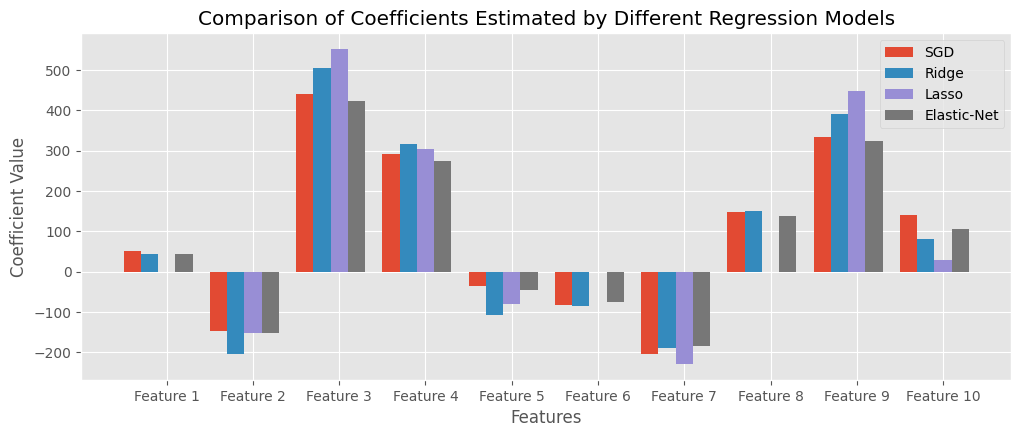

In [9]:
# Extracting coefficients from all models
models = ['SGD', 'Ridge', 'Lasso', 'Elastic-Net']
coefficients = [sgd_model.coef_, ridge_model.coef_, lasso_model.coef_, elasticnet_model.coef_]

# Set ggplot style
plt.style.use('ggplot')

# Setting width of bar
bar_width = 0.2

# Plotting coefficients for each model
plt.figure(figsize=(12, 4.5))

for i, (model, coef) in enumerate(zip(models, coefficients)):
    x = np.arange(1, len(coef) + 1) + i * bar_width
    plt.bar(x, coef, width=bar_width, label=model)

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients Estimated by Different Regression Models')
plt.xticks(np.arange(1, len(coef) + 1) + bar_width * (len(models) / 2), [f'Feature {i}' for i in range(1, len(coef) + 1)])
plt.legend()
plt.grid(True)
plt.show()



從上面的圖可以看到Lasso regression有特徵挑選的效果，有些影響較小的特徵，迴歸係數(斜率)會整個被刪除。

### 比較預測的值

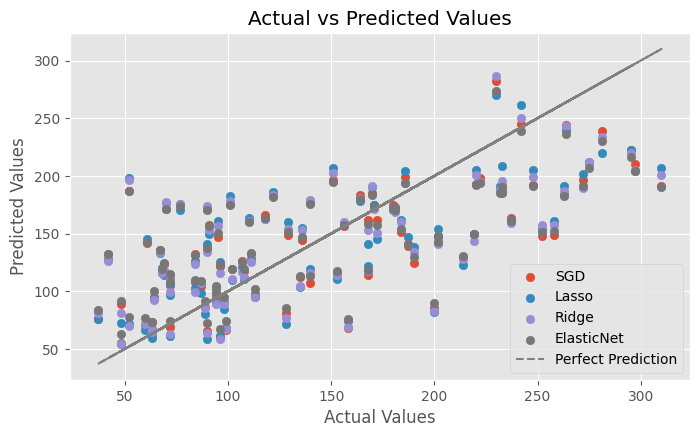

In [10]:
# Create figure
plt.figure(figsize=(8, 4.5))

# Add scatter plot for SGD Regression
plt.scatter(y_test, y_pred_sgd, label='SGD', marker='o')

# Add scatter plot for Lasso Regression
plt.scatter(y_test, y_pred_lasso, label='Lasso', marker='o')

# Add scatter plot for Ridge Regression
plt.scatter(y_test, y_pred_ridge, label='Ridge', marker='o')

# Add scatter plot for ElasticNet Regression
plt.scatter(y_test, y_pred_elasticnet, label='ElasticNet', marker='o')

# Add perfect prediction line
plt.plot(y_test, y_test, color='grey', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend(loc='lower right')

# Add grid
plt.grid(True)

# Show plot
plt.show()


基本上預測的結果都蠻相近的，沒有明顯差異。